**File reading**
***

In [2]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('docs/simpsons_dataset.csv').dropna()

# imprima las primeras 5 filas
df.head()

#Cambiamos las etiquetas texutales por etiquetas numericas, esto es una buena practica cuando se construyen modelo supervisados
# df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head(20) # returns (rows, columns)

(131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
10,Landlady,"Hey, hey, he Moved out this morning. He must h..."


## Text Pre Processing for embeddings

In [3]:
import gzip
import gensim
import logging

### BOW

In [4]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess(line)

In [5]:
from gensim.utils import simple_preprocess

def preproccess(line):
    return simple_preprocess(line)



df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Miss Hoover,"No, actually, it was a little of both. Sometim...","[no, actually, it, was, little, of, both, some..."
1,Lisa Simpson,Where's Mr. Bergstrom?,"[where, mr, bergstrom]"
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,"[don, know, although, sure, like, to, talk, to..."
3,Lisa Simpson,That life is worth living.,"[that, life, is, worth, living]"
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,"[the, polls, will, be, open, from, now, until,..."
5,Martin Prince,I don't think there's anything left to say.,"[don, think, there, anything, left, to, say]"
6,Edna Krabappel-Flanders,Bart?,[bart]
7,Bart Simpson,Victory party under the slide!,"[victory, party, under, the, slide]"
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,"[mr, bergstrom, mr, bergstrom]"
10,Landlady,"Hey, hey, he Moved out this morning. He must h...","[hey, hey, he, moved, out, this, morning, he, ..."


In [6]:
documents = df['proccesed'].to_numpy()

In [7]:
model_skipgram = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)
model_skipgram.train(documents,total_examples=len(documents),epochs=10)

(9560442, 12451860)

In [8]:
model_skipgram.save("word2vec150.model")

In [9]:
print(model_skipgram.wv['morning'])

[-0.57938755  0.10451695  0.37322858 -0.66045964 -0.16540527 -0.06244459
  0.00889869  0.15900299  0.30410498 -0.21031415  0.00862175 -0.4026467
  0.64045244  0.27954206  0.7704958  -0.3185606   0.3559006  -0.6395034
 -0.07271343  0.13590282 -0.35718593  0.22284472  0.37601382 -0.23679037
  0.0096482  -0.04480964 -0.17798354  0.18839604 -0.0651294   0.12788063
  0.34005705 -0.03054913 -0.19597493 -0.36376822  0.3081268  -0.1465973
  0.389505    0.56744283 -0.01943362 -0.57450086  0.25968185  0.25615278
 -0.41666585  0.18276    -0.40121353  0.32021707 -0.02672151  0.39040413
  0.021103   -0.05044132  0.26318133 -0.3608507  -0.08131386  0.19575714
  0.15852942 -0.53115183  0.18818858  0.59303254  0.22963929  0.14398015
 -0.5641063  -0.29898462 -0.38439462 -0.46987277 -0.5995657  -0.22941528
 -0.7175776  -0.22315687  0.08424884 -0.8891552  -0.03808752  0.17473593
  0.30269316 -0.25147772  0.30705234  0.08911581  0.22450452 -0.03128996
 -0.26693127 -0.02565799  0.57148343  0.11324604  0.03

In [10]:
model_100 = gensim.models.Word2Vec (documents, vector_size=100, window=10, min_count=2, workers=10, sg=1)
model_100.train(documents,total_examples=len(documents),epochs=10)

(9562121, 12451860)

In [11]:
model_100.save("word2vec100.model")

In [12]:
print(model_100.wv['morning'])

[ 3.8394612e-01  4.1021496e-01 -1.2232957e-01 -7.8607267e-01
 -4.5243148e-03 -5.8927351e-01 -1.8422757e-01  6.1702216e-01
 -2.9568213e-01 -8.9416675e-02 -2.1965437e-01 -9.2915013e-02
  4.8043218e-01  1.7209266e-01 -3.9030689e-01  3.6300743e-01
  3.6765626e-01 -9.4204180e-02  8.6744830e-02 -2.6762247e-01
 -2.9197441e-02  2.1529292e-01  1.0331204e+00 -1.8130162e-01
  4.2516863e-01 -2.2942837e-02 -4.0182793e-01  5.0458711e-01
  3.3772254e-01 -3.5325146e-01 -1.3969643e-01  4.5999397e-02
  5.4476255e-01  1.9451010e-01 -3.5219619e-01  1.1121070e-01
  6.5669018e-01  3.6366820e-01  1.1770260e-01 -5.0733876e-01
  2.9666634e-02 -2.5205788e-01 -3.7113222e-04  9.5296185e-03
 -1.5633334e-01  1.0689181e-01 -1.6094187e-01 -3.5028973e-01
  2.4786386e-01 -4.5258556e-02 -1.2005380e-01  1.0917006e-01
  4.4542525e-02 -2.2465926e-01 -5.7084769e-01 -2.2368282e-02
 -3.9094850e-01  9.6943267e-02 -2.0596536e-01  1.3699169e-01
 -1.1428930e-01  2.3312020e-01 -5.5754435e-01  3.2740220e-01
 -3.4608191e-01  3.37197

In [13]:
model_50 = gensim.models.Word2Vec(documents, vector_size=50, window=10, min_count=2, workers=10, sg=1)
model_50.train(documents,total_examples=len(documents),epochs=10)

(9561551, 12451860)

In [17]:
model_50.save("word2vec50.model")


In [18]:
df.shape

(131853, 3)

## Read


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [18]:

model50 = gensim.models.Word2Vec.load("word2vec50.model")
model100 = gensim.models.Word2Vec.load("word2vec100.model")
model150 = gensim.models.Word2Vec.load("word2vec150.model")

In [19]:
model50.wv.similar_by_word('homer')

[('marge', 0.827936589717865),
 ('simpson', 0.7971497774124146),
 ('bart', 0.7808811664581299),
 ('wildcats', 0.7715546488761902),
 ('you', 0.7641118764877319),
 ('fonzie', 0.7587495446205139),
 ('toothbrush', 0.7567184567451477),
 ('brodka', 0.7545030117034912),
 ('sampson', 0.7533972859382629),
 ('mr', 0.7523989081382751)]

In [23]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig(f'./{word}_{n}.jpg')
    plt.show()

## Graphs and analysis
***

**Vector dimension:** 50

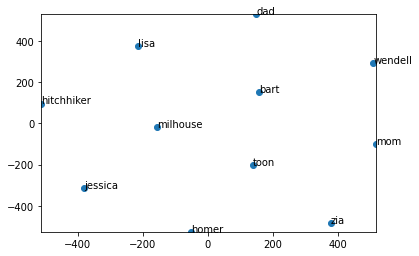

In [24]:
display_closestwords_tsnescatterplot(model50, 'bart', 50)

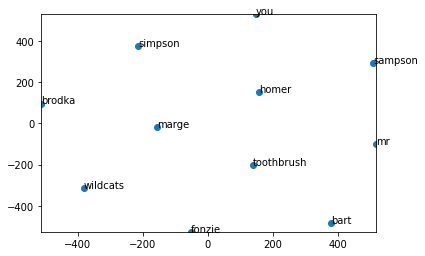

In [25]:
display_closestwords_tsnescatterplot(model50, 'homer', 50)

**Vector dimension:** 100

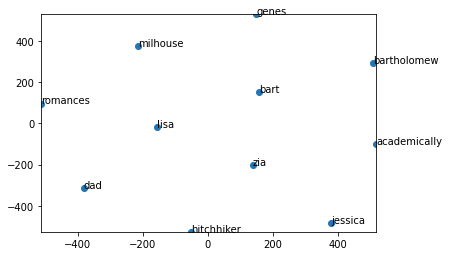

In [26]:
display_closestwords_tsnescatterplot(model100, 'bart', 100)

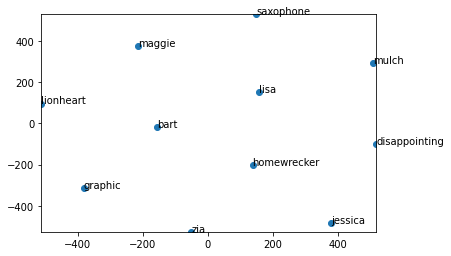

In [27]:
display_closestwords_tsnescatterplot(model100, 'lisa', 100)

**Vector size:** 150

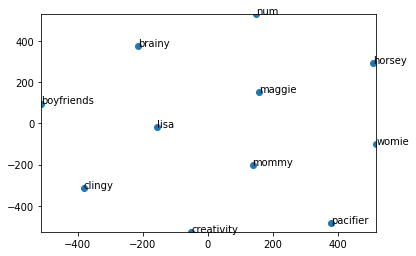

In [28]:
display_closestwords_tsnescatterplot(model150, 'maggie', 150)

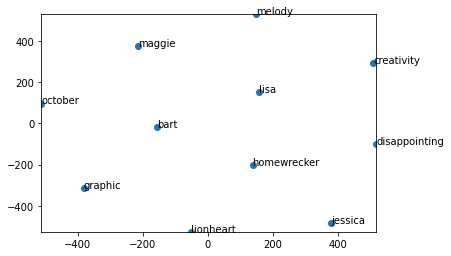

In [29]:
display_closestwords_tsnescatterplot(model150, 'lisa', 150)

# Redes neuronales

In [36]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from sklearn.model_selection import train_test_split

In [42]:
vectorize_layer = TextVectorization(
    ngrams=None, 
    max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True, 
)

In [39]:
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values
y = df['raw_character_text'].values
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)

# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test,y_test))

# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))

In [43]:
# Now that the vocab layer has been created, call `adapt` on the text-only
# dataset to create the vocabulary
vectorize_layer.adapt(text_dataset.batch(64))

In [ ]:
##LAYERS

# Start by creating an explicit input layer. It needs to have a shape of  
# (1,) (because we need to guarantee that there is exactly one doc
text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')

# The first layer in our model is the vectorization layer. After this layer,
# we have a tensor of shape (batch_size, max_len) containing vocab indices.

x = vectorize_layer(text_input)
x = layers.Dense(10, activation='relu')(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(1, activation='sigmoid', name='predictions')(x)
model = tf.keras.Model(text_input, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/
# Ojo con las metricas ya que el entrenamiento es en batches
# https://keras.io/api/models/model_training_apis/
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])